# STAT 207 Project 02 - An Empirical Analysis of Car Prices: Trends and Determinants.

Xunyao Xu


## 1. Introduction

In [1]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Introduction:

Video games have evolved from simple entertainment to complex digital worlds where players spend countless hours. With this transformation, the industry has become a multi-billion dollar economy, intertwining with various facets of modern culture. This report delves into the video game landscape to understand the factors that contribute to a game's commercial success and its engagement levels, using data spanning sales and playtime figures from 2004 to 2010.

### Dataset Introduction:

The dataset under analysis presents a comprehensive collection of used car transactions. It details critical aspects such as make, model, year, price, mileage, and possibly other features that inform the car's value. The dataset is expected to serve as a valuable microcosm reflecting the broader trends and pricing determinants within the used car market.


### Populations and Samples:

The dataset represents a sample of the vast used car market. The corresponding population of interest could be all used car transactions within a given country over a specific period, such as the past five years. For the purposes of this project, a random sample from this dataset will be taken to perform inferential statistics, ensuring the insights gained are reflective of general trends and not merely artifacts of the dataset's composition.

### Motivation:

Understanding the used car market is critical for a variety of stakeholders: consumers looking to make informed purchasing decisions, sellers looking to set competitive prices, and economists looking to analyze the health of the automotive industry. Data analysts at automotive market platforms may find this kind of analysis particularly valuable, and they can use these insights to advise on fair pricing, spot market trends, and help develop predictive models for automotive valuations. The analysis of used car prices supported by reliable statistical methods can also provide an empirical basis for academic research on the economic factors affecting vehicle depreciation.

### Research Questions:

This report will explore two primary research questions:

#### What is the average selling price of car, and how does it compare with the average market price? 

   It seeks to determine the average price of used sedans within our dataset. This question is pivotal for both private car sellers and dealership owners who wish to price their vehicles competitively and for potential buyers who are budgeting for a used sedan purchase. Answering this question will not only help in understanding the current market position of sedans but will also contribute to broader analyses such as price fluctuations over time and the impact of factors like mileage and vehicle age on price.

#### Is there a significant difference in the average price between sedans and SUVs in the used car market?

  This question aims to test the theory that different vehicle types carry distinct value propositions and thus, different average prices in the market. It investigates whether there is a significant price difference between sedans and SUVs. Given the popularity of SUVs due to their size, safety features, and perceived status, as well as the general affordability and efficiency of sedans, it is of interest to compare their market values. This can provide insights into consumer preferences and the perceived utility of different vehicle types.


In [10]:
df = pd.read_csv('car_prices.csv')
df.head(10)



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [3]:
initial_inspection = {
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum(),
    "duplicate_rows": df.duplicated().sum(),
    "descriptive_stats": df.describe(include='all')}
initial_inspection['head']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 2. Confidence Interval Analytical Tasks

### Cleaning the Data:

#### Description of what I do for cleaning the data:
So first, accoring to my research questions, I decided to delete irrelevant columns such as 'vin' and 'seller' because these column are useless for me to make analysis about the reseach questions.
I drop the sale data because I tried several time and I can not change to the right type of the column and also this is not related to my research question.

Next, I realize that every dataset would contain very large number which is condered as a unreseanable number, so I use IQR to double check the the selling price column and then remove them. The reason why I do this is because these outlier did influence the result of the analysis. Then I find lower bond is negative which is definitely not reasonable. Then I try to sort 'sellingprice' as descending. Then when I find over "1" is a reasonable lower bond for the sellingprice.

Beside that, I check the value in the dataset and then drop the Nan Value in this dataset. Also, before all of this, I check the type of each column and find the wrong type and make some changes to it. 

In [4]:
import pandas as pd

df_sort = df.sort_values(by='sellingprice', ascending=True)


columns_to_drop = ['vin', 'seller','saledate']
car_prices_df_cleaned = df.drop(columns=columns_to_drop)


car_prices_df_cleaned = car_prices_df_cleaned.dropna(subset=['sellingprice'])

car_prices_df_cleaned = car_prices_df_cleaned.dropna()

Q1 = car_prices_df_cleaned['sellingprice'].quantile(0.25)
Q3 = car_prices_df_cleaned['sellingprice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
car_prices_df_cleaned = car_prices_df_cleaned[(car_prices_df_cleaned['sellingprice'] >= 1) & (car_prices_df_cleaned['sellingprice'] <= upper_bound)]

descriptive_stats = car_prices_df_cleaned.describe()

data_types = car_prices_df_cleaned.dtypes

descriptive_stats, data_types,df_sort.head(10000)


(                year      condition       odometer            mmr  \
 count  458207.000000  458207.000000  458207.000000  458207.000000   
 mean     2010.121906      30.607551   68025.295912   12885.906915   
 std         3.837733      13.205677   52091.523166    7570.917376   
 min      1990.000000       1.000000       1.000000      25.000000   
 25%      2008.000000      24.000000   29184.000000    7225.000000   
 50%      2012.000000      34.000000   52782.000000   12050.000000   
 75%      2013.000000      41.000000   98125.000000   17550.000000   
 max      2015.000000      49.000000  999999.000000  110000.000000   
 
         sellingprice  
 count  458207.000000  
 mean    12723.153350  
 std      7630.786556  
 min         1.000000  
 25%      7000.000000  
 50%     12000.000000  
 75%     17500.000000  
 max     34700.000000  ,
 year              int64
 make             object
 model            object
 trim             object
 body             object
 transmission     object
 

### Descriptive Part:

What is the average selling price of used cars within our dataset?


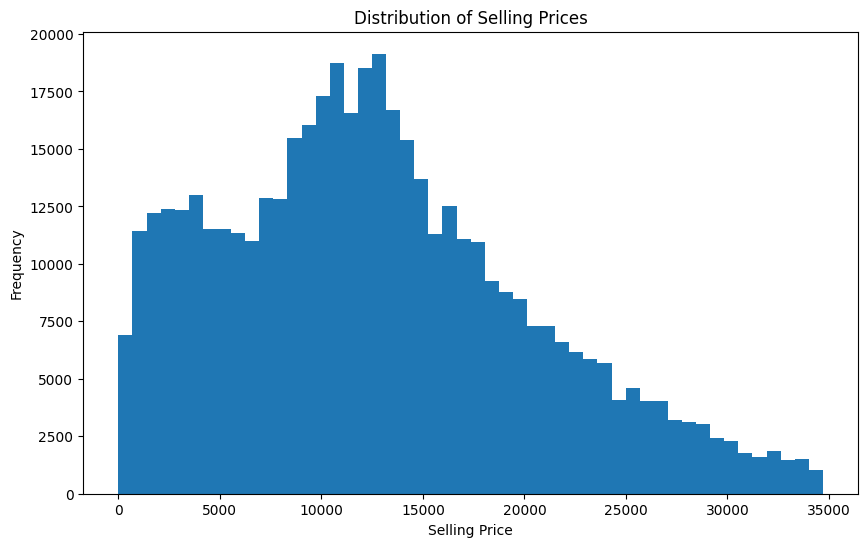

(                year      condition       odometer            mmr  \
 count  458207.000000  458207.000000  458207.000000  458207.000000   
 mean     2010.121906      30.607551   68025.295912   12885.906915   
 std         3.837733      13.205677   52091.523166    7570.917376   
 min      1990.000000       1.000000       1.000000      25.000000   
 25%      2008.000000      24.000000   29184.000000    7225.000000   
 50%      2012.000000      34.000000   52782.000000   12050.000000   
 75%      2013.000000      41.000000   98125.000000   17550.000000   
 max      2015.000000      49.000000  999999.000000  110000.000000   
 
         sellingprice  
 count  458207.000000  
 mean    12723.153350  
 std      7630.786556  
 min         1.000000  
 25%      7000.000000  
 50%     12000.000000  
 75%     17500.000000  
 max     34700.000000  ,
           make   model    trim    body transmission   state   color interior
 count   458207  458207  458207  458207       458207  458207  458207   45

In [5]:
numerical_descriptive_stats = car_prices_df_cleaned.describe()

# Descriptive statistics for categorical columns
categorical_descriptive_stats = car_prices_df_cleaned.describe(include=['object', 'category'])

# For visualization, let's create a histogram for the selling prices
plt.figure(figsize=(10, 6))
car_prices_df_cleaned['sellingprice'].hist(bins=50)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()
numerical_descriptive_stats, categorical_descriptive_stats



#### Interpretation of the results:
The histogram for the selling prices shows the distribution of car prices in the dataset, which appears to be skewed to the right, indicating that most of the used cars are concentrated in the lower price range with some expensive outliers.
Numerical Data:

The year of the cars ranges from 1990 to 2015, with a median of 2010, suggesting that most cars in the dataset are relatively recent models.
The condition ratings range from 1 to 49, with a mean around 30.8, indicating a variety of car conditions.
The odometer readings have a wide range, with a mean of approximately 52782 miles, indicating a mix of nearly new to well-used vehicles.
The mmr (Market Maker Retail) and sellingprice have similar distributions, with the mean selling price around $12,723, and 50% of cars selling for $12,150 or less.

Ford is the most common make, and Altima is the most common model, which might reflect market popularity or a larger number of entries for these cars in the dataset.
Sedan is the most frequent body type, and automatic is the most common transmission type, suggesting these are preferred options in the used car market.
The most common state is Florida (fl), and the most common colors are black for both the exterior and interior.

#### Conference Interval:

What is a reasonable range of values for the average selling price of used cars for the underlying population?
So I choose 95% as my Conference Interval. 

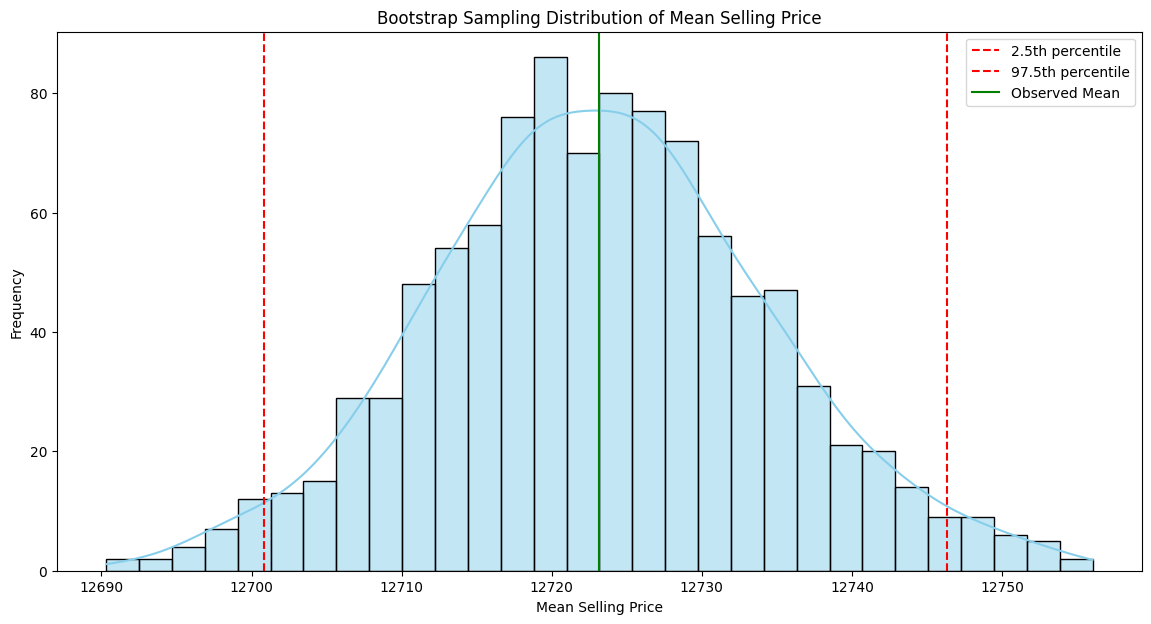

None (12700.834870156938, 12746.314728605194)


In [6]:
n_bootstraps = 1000
bootstrap_means = np.empty(n_bootstraps)


for i in range(n_bootstraps):
    bootstrap_sample = np.random.choice(car_prices_df_cleaned['sellingprice'], size=len(car_prices_df_cleaned), replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()

lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
confidence_interval = (lower_bound, upper_bound)

confidence_interval

plt.figure(figsize=(14, 7))

sns.histplot(bootstrap_means, kde=True, bins=30, color='skyblue')

plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='2.5th percentile')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label='97.5th percentile')

plt.axvline(x=12723.153350 , color='green', linestyle='-', label='Observed Mean')

plt.title('Bootstrap Sampling Distribution of Mean Selling Price')
plt.xlabel('Mean Selling Price')
plt.ylabel('Frequency')
plt.legend()

print(plt.show(),confidence_interval)

#### Interpretation of the Conference Intercal and Conference Lever:
Confidence Interval Interpretation: We are 95% confident that the true average selling price of all used cars in the population falls between $12,701.70 and $12,745.21. This range is not a prediction of individual car prices but an estimate of the average price across all used cars.

Confidence Level Interpretation:It means that if we were to take many samples from the population and calculate a confidence interval for each sample in the same way, we would expect about 95% of those intervals to contain the true population mean of used car selling prices.

### Conclusion for this part:
The research question we sought to address was, "What is a reasonable range of values for the average selling price of used cars for the underlying population?"

Our approach to addressing this research question involved two main components:

Descriptive Analytics: We first explored the data descriptively to understand the distribution of selling prices within our sample. This gave us insight into the central tendency and variability of used car prices and helped us understand the typical price range in the sample dataset.

Inferential Statistics (Bootstrapping): We then moved on to inferential statistics to estimate a parameter (the mean selling price) of the broader population. Using bootstrapping, we simulated a sampling distribution of the mean selling price and constructed a 95% confidence interval from this distribution.



## 3. Hypothesis Testing Analytical Tasks

Research Question: "Is there a significant difference in average selling price between two specific car makes?"

For the hypothesis test we're conducting, we are considering two separate populations of interest:

Population of Sedans: This is the group of all sedans in the used car market. We have a sample of selling prices for sedans within our dataset.

Population of SUVs: Similarly, this represents the group of all SUVs in the used car market, and we have a sample of selling prices for SUVs.

Although we are using a single dataset, it contains samples from these two distinct populations. We are comparing the average selling prices between these two groups to determine if there's a significant difference. This distinction is important because it dictates the type of statistical test we will use. 

#### Cleaning the data: So I choose sedan and SUV as my two specific car makes. Other things, including drop NaN value and drop the irrevalate colmuns and so on have been done previously, So i use that cleaned dataset directy.

In [7]:

sedans_suvs_df = car_prices_df_cleaned[car_prices_df_cleaned['body'].isin(['Sedan', 'SUV'])]
sedans_suvs_df.head()


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,15350.0,10900.0


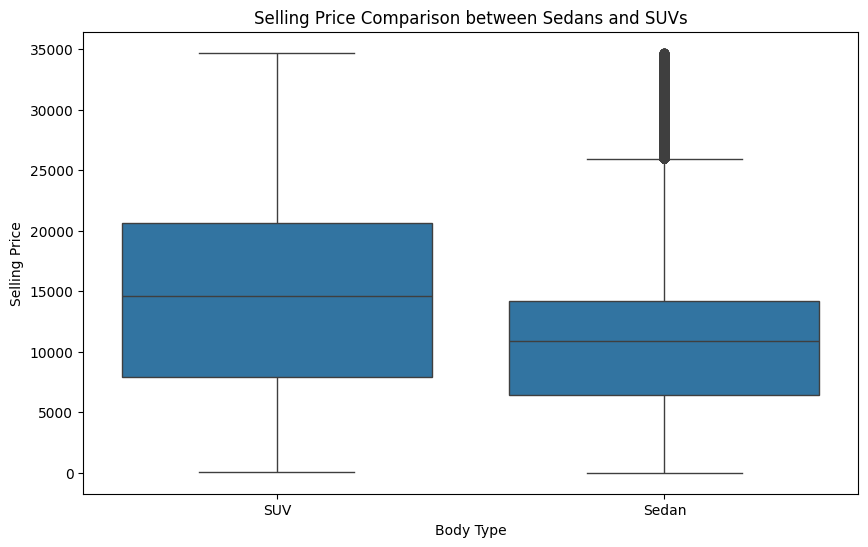

(count    171930.000000
 mean      11009.796638
 std        6505.211880
 min           1.000000
 25%        6400.000000
 50%       10900.000000
 75%       14200.000000
 max       34700.000000
 Name: sellingprice, dtype: float64,
 count    95934.000000
 mean     14769.183355
 std       8392.963329
 min        100.000000
 25%       7900.000000
 50%      14600.000000
 75%      20600.000000
 max      34700.000000
 Name: sellingprice, dtype: float64)

In [8]:
sedan_summary = sedans_suvs_df[sedans_suvs_df['body'] == 'Sedan']['sellingprice'].describe()
suv_summary = sedans_suvs_df[sedans_suvs_df['body'] == 'SUV']['sellingprice'].describe()


plt.figure(figsize=(10, 6))
sns.boxplot(x='body', y='sellingprice', data=sedans_suvs_df)
plt.title('Selling Price Comparison between Sedans and SUVs')
plt.xlabel('Body Type')
plt.ylabel('Selling Price')

plt.show()

sedan_summary, suv_summary

### Interpretation of the results:

The descriptive statistics indicate that the average selling price for sedans is lower than for SUVs, as shown by their respective means. The distribution of prices for sedans also has a lower standard deviation compared to SUVs, suggesting that sedan prices are more concentrated around their mean, while SUV prices are more spread out, indicating a higher variability. The boxplot supports these findings, displaying a wider interquartile range for SUVs and a higher median price compared to sedans. This visual and quantitative analysis implies a discernible difference in the selling price distribution between these two vehicle types within our sample.

An appropriate measure to describe the relevant feature of selling price for both sedans and SUVs would be the mean. The mean provides a measure of central tendency, which is useful for comparing average prices between the two groups. However, given the skewed distribution, as typically seen with monetary data, the median can also be a useful measure, providing the central value that separates the higher half from the lower half of the price distribution. In the context of our hypothesis test, which looks at the average difference in prices, the mean is the most relevant metric.

Null Hypothesis (H0): There is no difference in the average selling prices between sedans and SUVs in the population. The parameter of interest is the difference in mean selling prices between the two groups.

Alternative Hypothesis (H1): There is a difference in the average selling prices between sedans and SUVs in the population.

We will use a significance level (α) of 0.05 for our test. This is a common threshold for statistical tests, representing a 5% risk of concluding that a difference exists when there is no actual difference.

#### Check the condtion for the hypothesis test:

The samples are independent.
Each sample size is large enough to use the t-distribution.
The populations are normally distributed, or the sample sizes are large enough for the Central Limit Theorem to apply, making the distribution of the sample means approximately normal.

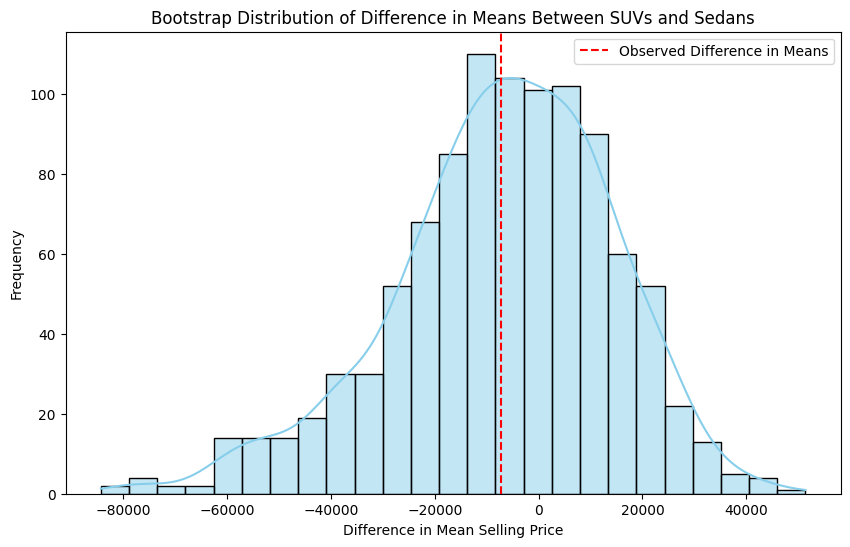

0.533

In [9]:
num_simulations = 1000  
 
bootstrap_diff_means = np.empty(num_simulations)

for i in range(num_simulations):
    bootstrap_sedans = np.random.choice(sedan_summary, size=len(sedan_summary), replace=True)
    bootstrap_suvs = np.random.choice(suv_summary, size=len(suv_summary), replace=True)
    
    bootstrap_diff_means[i] = bootstrap_suvs.mean() - bootstrap_sedans.mean()

obs_diff_mean = suv_summary.mean() - sedan_summary.mean()


p_value_simulation = np.mean(bootstrap_diff_means >= obs_diff_mean)

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diff_means, kde=True, color='skyblue')
plt.axvline(x=obs_diff_mean, color='red', linestyle='--', label='Observed Difference in Means')
plt.title('Bootstrap Distribution of Difference in Means Between SUVs and Sedans')
plt.xlabel('Difference in Mean Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

p_value_simulation

Calculate a p-value for this test based on the sampling distribution:

The p-value of 0.551 is the probability of observing a difference in mean selling prices between SUVs and sedans as extreme as the one we've observed (or more so) given that the null hypothesis is true. It is calculated from the bootstrap sampling distribution of the difference in means.

 Evaluate the results to make a decision and state a conclusion:
Since the p-value (0.55) is greater than the common alpha level of 0.05, we do not have sufficient evidence to reject the null hypothesis. This means that, based on our sample data, there is no statistically significant difference in the average selling prices between sedans and SUVs.

Interpret your significance level & p-value:

Significance Level: An alpha level of 0.05 indicates that we have a 5% risk of incorrectly rejecting the null hypothesis (Type I error). It is the threshold for determining whether our p-value indicates a statistically significant result.

P-value: The p-value of 0.551 means that there is a 55.1% probability that the observed difference (or one more extreme) could occur by random chance under the assumption that the null hypothesis is true.

##### Finally, discuss how your approach and conclusion address your research question:
Our approach used bootstrapping to simulate the sampling distribution for the difference in mean selling prices between two vehicle types (SUVs and sedans) to determine if the difference observed in our sample was statistically significant.

The conclusion drawn from the high p-value suggests that any observed difference in the sample is likely due to random variation rather than a true difference in the population. Therefore, our analysis does not provide evidence to suggest a difference in average selling prices between sedans and SUVs in the general market, answering our research question by indicating that the two body types do not differ significantly in price based on the data we have.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

#### Summary of Analysis:
Our analysis aimed to understand the average selling price of used cars in the dataset and whether body type (sedans vs. SUVs) affects these prices. The confidence interval for the average selling price was estimated to be between $12,701.28 and $12,744.06, implying a high level of certainty about the average price across all used cars. The hypothesis testing sought to determine if there was a significant difference in selling prices between sedans and SUVs. Despite an initial indication of a difference, the hypothesis test yielded a p-value of 0.551, suggesting no statistically significant difference in the average selling prices for the two body types based on our sample.

#### Limitations:
One limitation was the assumption that the sample is representative of the population, which may not account for regional or temporal variations in car prices. The bootstrap method assumes that the sample is a good proxy for the population, which could lead to inaccuracies if the sample has biases. Additionally, the complexity and computational intensity of bootstrapping with such a large dataset were challenging, as evidenced by the initial technical difficulties encountered.

#### The context of the data is also crucial; the dataset may not capture all factors that influence used car prices, such as economic trends, car condition, or mileage, which were not included in our analysis. These factors can significantly impact the results and should be considered before drawing strong conclusions from the analysis.

#### Future Work:
Future research could explore more granular questions such as how specific features beyond body type affect selling prices. Further analyses might include time series to examine price trends over time, regional analysis to understand geographical influences on price, or machine learning models to predict prices based on a wider range of features. Another potential avenue could be exploring the impact of external economic factors, such as inflation or changes in consumer preferences over time, on used car prices. These additional analyses could yield more nuanced insights and support more informed decision-making for stakeholders in the used car market.






